Found 234 normal images in the specified directory.
The dimensions of the first image are: (1857, 1317)


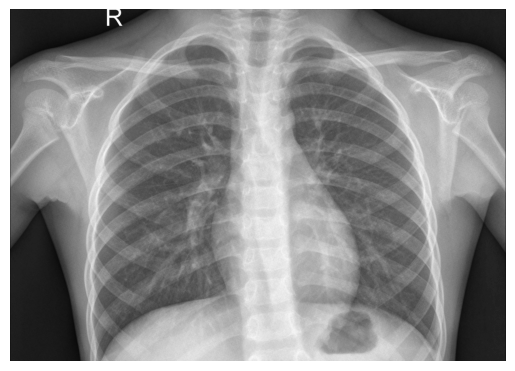

In [78]:
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np

# If we want to import the pictures from google drive into colab, we can also do that...

# Set the path to your image directory
normal_images_dir = '../../data/test/NORMAL'  # Adjust this to match your folder structure

# List all files in the folder
normal_images = [f for f in os.listdir(normal_images_dir) if f.endswith('.jpeg') or f.endswith('.jpg')]

# Print the number of images found
print(f"Found {len(normal_images)} normal images in the specified directory.")

# Load the first image
if normal_images:
    first_image_path = os.path.join(normal_images_dir, normal_images[0])
    first_image = Image.open(first_image_path)
    print(f"The dimensions of the first image are: {first_image.size}")
    
    # Display the first image
    plt.imshow(first_image, cmap='gray')
    plt.axis('off')  # Hide axes for better visualization
    plt.show()
else:
    print("No images found in the specified directory.")


Found 390 pneumonia images in the specified directory.
The dimensions of the first pneumonia image are: (1106, 762)


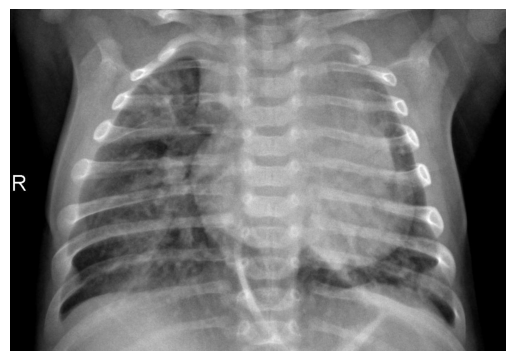

In [79]:
# Now let's import the images with pneumonia
pneumonia_images_dir = '../../data/test/PNEUMONIA'

# List all the pneumonia images
pneumonia_images = [f for f in os.listdir(pneumonia_images_dir) if f.endswith('.jpeg') or f.endswith('.jpg')]

# Print the number of pneumonia images found
print(f"Found {len(pneumonia_images)} pneumonia images in the specified directory.")

# Load the first pneumonia image
if pneumonia_images:
    first_pneumonia_image_path = os.path.join(pneumonia_images_dir, pneumonia_images[0])
    first_pneumonia_image = Image.open(first_pneumonia_image_path)
    print(f"The dimensions of the first pneumonia image are: {first_pneumonia_image.size}")
    
    # Display the first pneumonia image
    plt.imshow(first_pneumonia_image, cmap='gray')
    plt.axis('off')  # Hide axes for better visualization
    plt.show()

We can see that both images are not of the same dimension and we can see it in the sample pictures, so these will need to be scaled once we feed them into the pretrained models

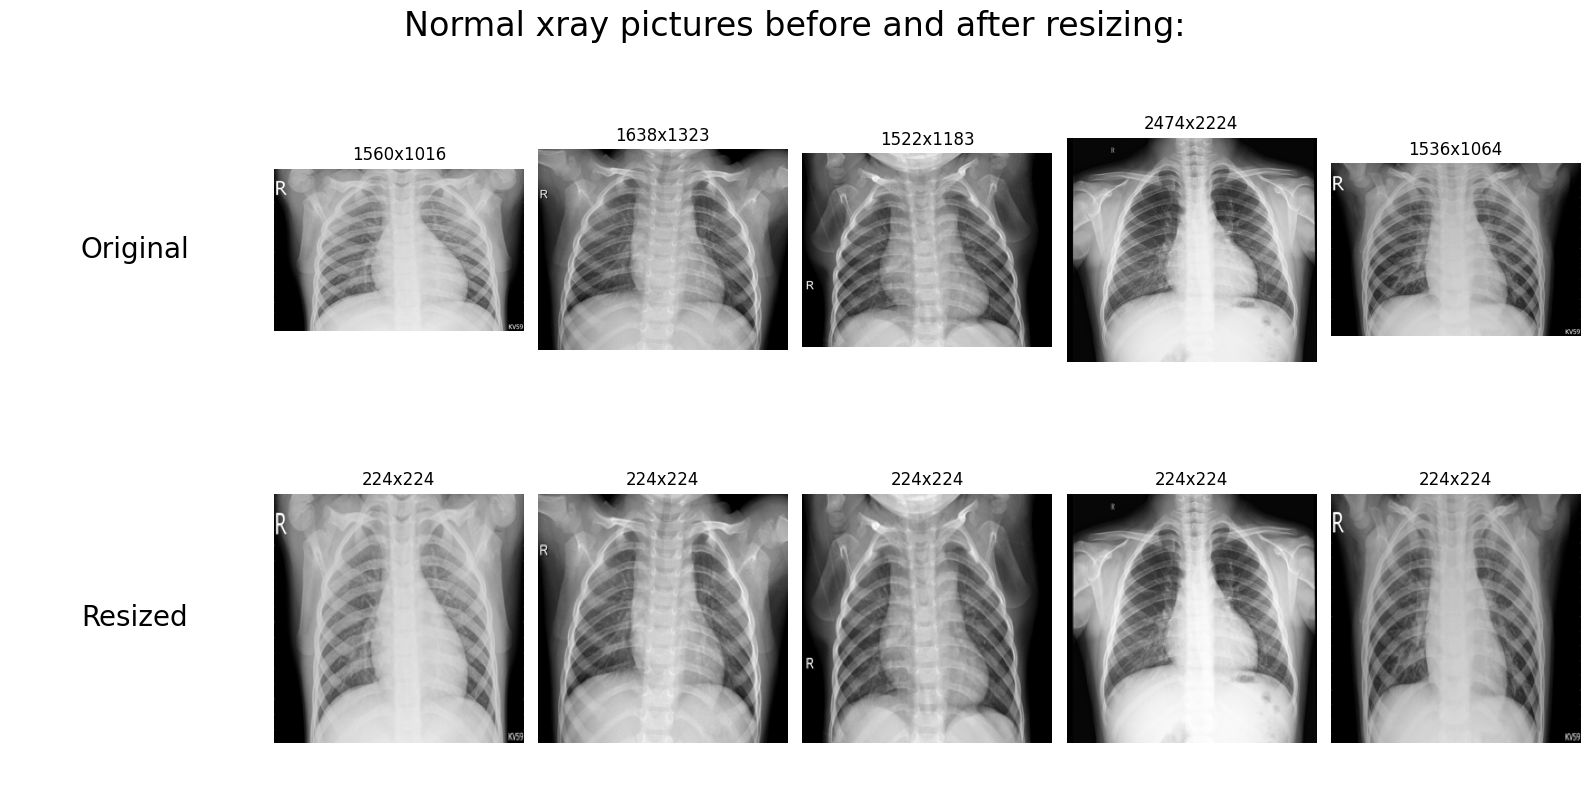

In [80]:
# Let's see how the images look like before and after resizing
sample_size = 5
image_size = (224, 224)  # Resize target

# Randomly sample images from each category
sampled_normal_images = np.random.choice(normal_images, sample_size, replace=False)
sampled_pneumonia_images = np.random.choice(pneumonia_images, sample_size, replace=False)

# Define the figure layout
fig = plt.figure(figsize=(16, 8))
fig.suptitle("Normal xray pictures before and after resizing:", fontsize=24, y=1)

# Function to open, resize, and return an image
def load_and_resize_image(image_path, size):
    image = Image.open(image_path).convert("L")  # Convert to grayscale
    resized_image = image.resize(size)  # Resize image to target dimensions
    return image, resized_image

# Add title for original images
ax = plt.subplot(2, sample_size + 1, 1)
ax.text(0.5, 0.5, 'Original', fontsize=20, ha='center', va='center')
plt.axis('off')

# Display the original images on top row with their dimensions
for i, image_name in enumerate(sampled_normal_images):
    original, resized = load_and_resize_image(os.path.join(normal_images_dir, image_name), image_size)
    
    # Original image with its dimensions
    ax = plt.subplot(2, sample_size + 1, i + 2)
    plt.imshow(original, cmap='gray')
    original_dims = f"{original.size[0]}x{original.size[1]}"
    plt.title(original_dims, fontsize=12)
    plt.axis('off')

# Add title for resized images
ax = plt.subplot(2, sample_size + 1, sample_size + 2)
ax.text(0.5, 0.5, 'Resized', fontsize=20, ha='center', va='center')
plt.axis('off')

# Display the resized images on bottom row with the target dimensions
for i, image_name in enumerate(sampled_normal_images):
    original, resized = load_and_resize_image(os.path.join(normal_images_dir, image_name), image_size)
    
    # Resized image with new dimensions
    ax = plt.subplot(2, sample_size + 1, sample_size + i + 3)
    plt.imshow(resized, cmap='gray')
    resized_dims = f"{resized.size[0]}x{resized.size[1]}"
    plt.title(resized_dims, fontsize=12)
    plt.axis('off')

# Show plot
plt.tight_layout()
plt.show()

As we can observe from the resizing of the images, they look recognizable and there doesn't appear to be much of a significant loss of information following the resizing of the images.

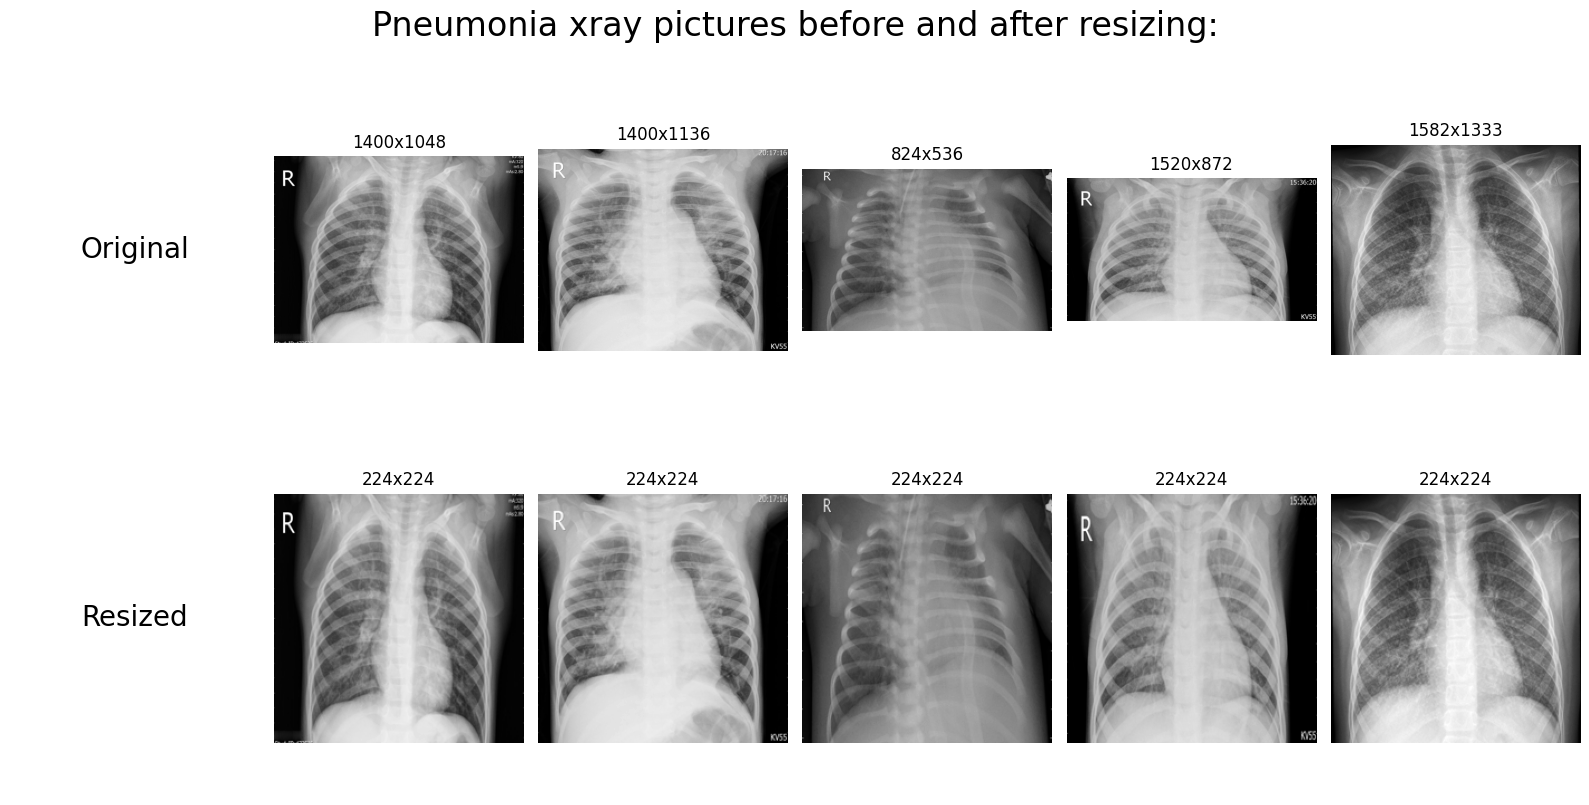

In [81]:
# Let's see how the pneumonia images look like before and after resizing
fig = plt.figure(figsize=(16, 8))
fig.suptitle("Pneumonia xray pictures before and after resizing:", fontsize=24, y=1)

# Add title for original images
ax = plt.subplot(2, sample_size + 1, 1)
ax.text(0.5, 0.5, 'Original', fontsize=20, ha='center', va='center')
plt.axis('off')

# Display the original images on top row with their dimensions
for i, image_name in enumerate(sampled_pneumonia_images):
    original, resized = load_and_resize_image(os.path.join(pneumonia_images_dir, image_name), image_size)
    
    # Original image with its dimensions
    ax = plt.subplot(2, sample_size + 1, i + 2)
    plt.imshow(original, cmap='gray')
    original_dims = f"{original.size[0]}x{original.size[1]}"
    plt.title(original_dims, fontsize=12)
    plt.axis('off')

# Add title for resized images
ax = plt.subplot(2, sample_size + 1, sample_size + 2)
ax.text(0.5, 0.5, 'Resized', fontsize=20, ha='center', va='center')
plt.axis('off')

# Display the resized images on bottom row with the target dimensions
for i, image_name in enumerate(sampled_pneumonia_images):
    original, resized = load_and_resize_image(os.path.join(pneumonia_images_dir, image_name), image_size)
    
    # Resized image with new dimensions
    ax = plt.subplot(2, sample_size + 1, sample_size + i + 3)
    plt.imshow(resized, cmap='gray')
    resized_dims = f"{resized.size[0]}x{resized.size[1]}"
    plt.title(resized_dims, fontsize=12)
    plt.axis('off')

# Show plot
plt.tight_layout()
plt.show()

Pneumonia images seem to retain most of their information as well!